# Object Tracking

In [2]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d kmader/videoobjecttracking

Saving kaggle.json to kaggle.json
100% 5.80G/5.83G [00:43<00:00, 121MB/s]
100% 5.83G/5.83G [00:44<00:00, 142MB/s]
unzip:  cannot find or open /content/kmader/videoobjecttracking.zip, /content/kmader/videoobjecttracking.zip.zip or /content/kmader/videoobjecttracking.zip.ZIP.


In [4]:
! unzip -q /content/videoobjecttracking.zip

In [3]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
import matplotlib.pyplot as plt
from skimage.io import imread

In [5]:
valid_gt_files = sorted([k for k, _, files in os.walk('/content/trackingdataset_tv77') if 'gt.txt' in files])
print('Found #{} ground truth files'.format(len(valid_gt_files)), valid_gt_files[54])

Found #77 ground truth files /content/trackingdataset_tv77/TrackingDataset/Kwon_VTD/soccer


In [6]:
read_gt = lambda dir_name: pd.read_table(os.path.join(dir_name,'gt.txt'), header = None, sep = '\s+', names = 'topleftX,topleftY,bottomRightX,bottomRightY'.split(','))
get_images = lambda dir_name: {int(os.path.splitext(k)[0].split('_')[-1]): k for k in glob(os.path.join(dir_name, '*.jpg'))}
soccer_gt_df = read_gt(valid_gt_files[54])
soccer_img_dict = get_images(valid_gt_files[54])
soccer_gt_df['path'] = soccer_gt_df.index.map(soccer_img_dict.get)
soccer_gt_df.dropna(inplace = True)
soccer_gt_df.sample(3)

topleftX  topleftY  bottomRightX  bottomRightY  \
233       309       171           337           201   
282       303       155           326           181   
390       330       168           360           214   

                                                  path  
233  /content/trackingdataset_tv77/TrackingDataset/...  
282  /content/trackingdataset_tv77/TrackingDataset/...  
390  /content/trackingdataset_tv77/TrackingDataset/...

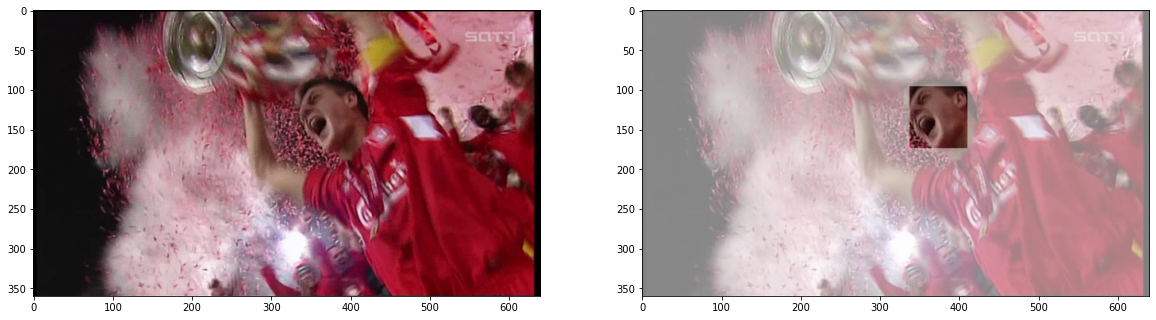

In [7]:
_, test_row = next(soccer_gt_df.sample(1, random_state = 2018).iterrows())
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
c_img = imread(test_row['path'])
ax1.imshow(c_img)
# add alpha layer
d_img = np.concatenate([c_img, np.zeros(c_img.shape[:2]+(1,), dtype = np.uint8)], 2)
d_img[:, :, 3] = 127
d_img[test_row['topleftY']:test_row['bottomRightY'],
      test_row['topleftX']:test_row['bottomRightX'],
     3] = 255
ax2.imshow(d_img)

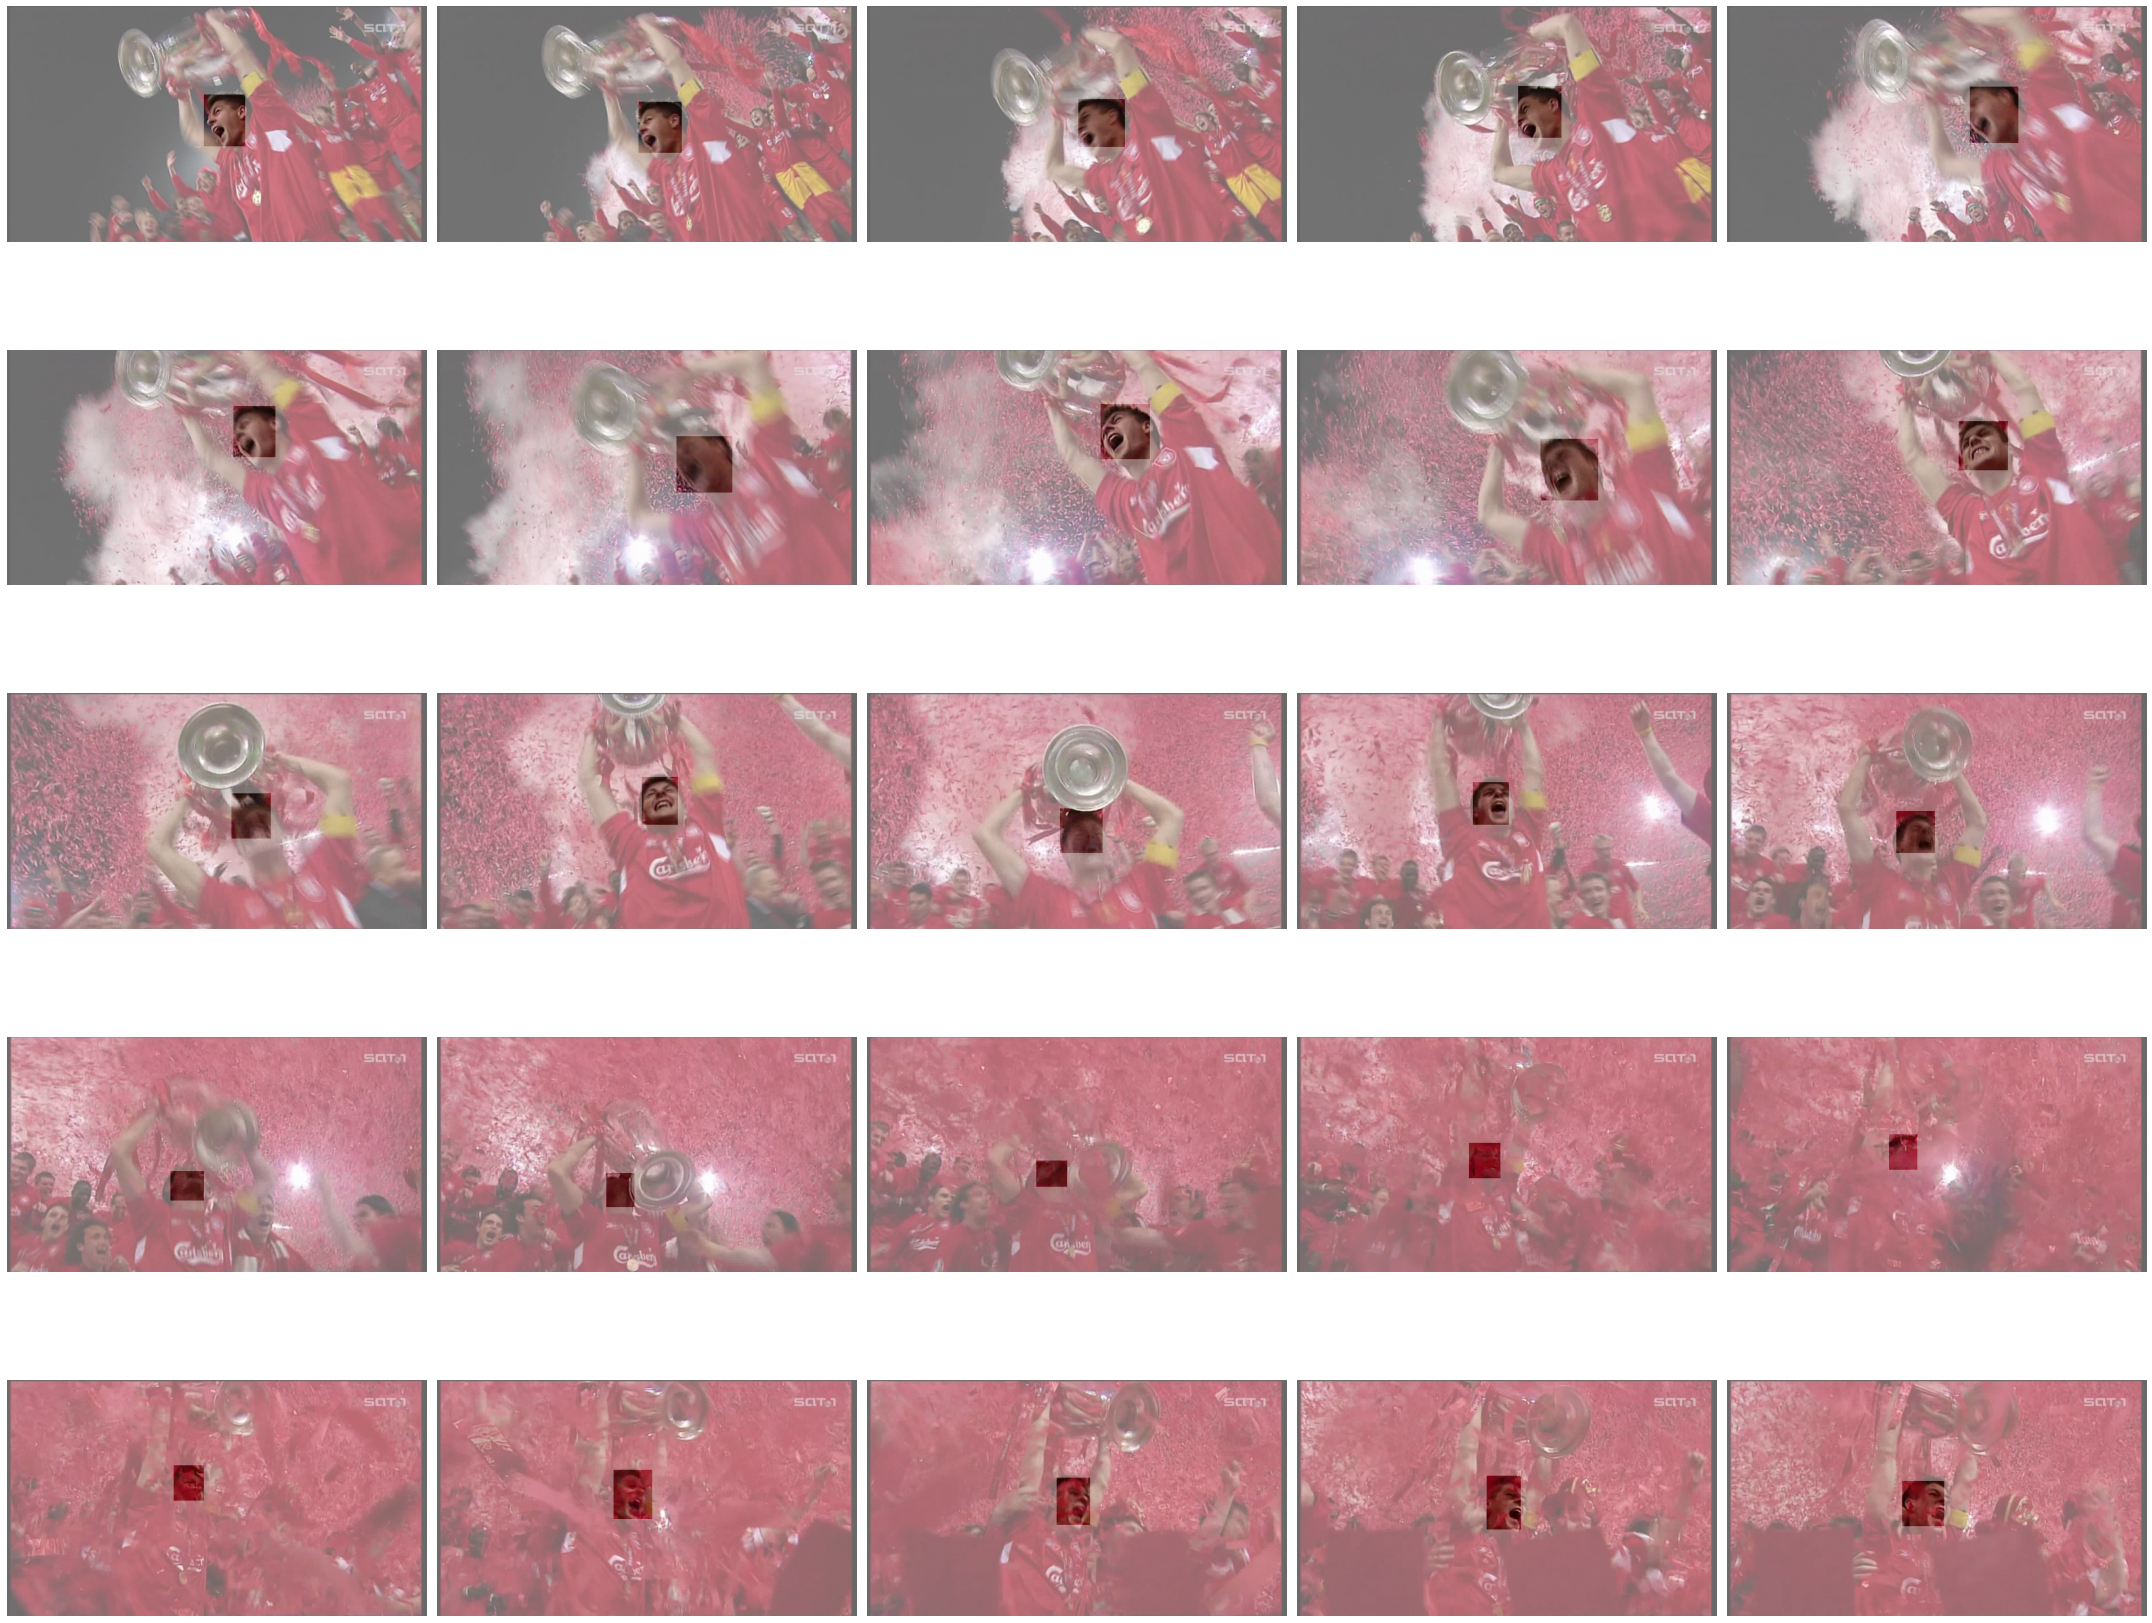

In [8]:
fig, m_axs = plt.subplots(5, 5, figsize = (30, 25))
for c_ax, (_, test_row) in zip(m_axs.flatten(), 
                            soccer_gt_df[::6].iterrows()):
    c_img = imread(test_row['path'])
    d_img = np.concatenate([c_img, np.zeros(c_img.shape[:2]+(1,), dtype = np.uint8)], 2)
    d_img[:, :, 3] = 150
    d_img[test_row['topleftY']:test_row['bottomRightY'],
          test_row['topleftX']:test_row['bottomRightX'],
         3] = 255
    c_ax.imshow(d_img)
    c_ax.axis('off')
fig.tight_layout()
fig.savefig('frame_previews.png', dpi = 600)